In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ml_help
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from time import time
sns.set_theme()

# Load data

In [2]:
flow_df = pd.read_csv("./data/yonge_flow.csv.zip")
weather_df = pd.read_csv("./data/weather_data.csv.zip")

In [3]:
flow_df["collectedAt"] = pd.to_datetime(flow_df["collectedAt"],utc=True)
weather_df["collectedAt"] = pd.to_datetime(weather_df["collectedAt"],utc=True)

In [4]:
flow_df.drop(['month', 'day', 'day_of_week', 'hour', 'minute'],inplace=True,axis=1)
weather_df.drop(['month', 'day', 'day_of_week', 'day_of_week_name', 'hour', 'minute', 'windDegree'],inplace=True,axis=1)

In [5]:
df = flow_df.merge(weather_df,on="collectedAt",how="inner")
df.head()

,collectedAt,currentSpeed,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,2022-07-16 04:50:00,18,10.0,21.16,21.29,75,3.60,75,0.0,0.0,1,0,0,0,0
1,2022-07-16 05:30:00,18,10.0,20.68,20.81,77,1.54,75,0.0,0.0,1,0,0,0,0
2,2022-07-16 05:10:00,18,10.0,20.75,20.89,77,1.50,100,0.0,0.0,1,0,0,0,0
3,2022-07-16 05:50:00,18,10.0,20.62,20.77,78,1.54,75,0.0,0.0,1,0,0,0,0
4,2022-07-16 04:55:00,18,10.0,21.18,21.31,75,3.60,75,0.0,0.0,1,0,0,0,0


In [6]:
df["month"] = df.collectedAt.dt.month
df["day_of_week"] = df.collectedAt.dt.weekday
df["hour"] = df.collectedAt.dt.hour
df["minute"] = df.collectedAt.dt.minute
df.drop("collectedAt",inplace=True,axis=1)
df.head()

,currentSpeed,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy,month,day,day_of_week,hour,minute
0,18,10.0,21.16,21.29,75,3.60,75,0.0,0.0,1,0,0,0,0,7,16,5,4,50
1,18,10.0,20.68,20.81,77,1.54,75,0.0,0.0,1,0,0,0,0,7,16,5,5,30
2,18,10.0,20.75,20.89,77,1.50,100,0.0,0.0,1,0,0,0,0,7,16,5,5,10
3,18,10.0,20.62,20.77,78,1.54,75,0.0,0.0,1,0,0,0,0,7,16,5,5,50
4,18,10.0,21.18,21.31,75,3.60,75,0.0,0.0,1,0,0,0,0,7,16,5,4,55


In [7]:
categorical_attrs = ["month", "day_of_week"]

transformed_df = pd.get_dummies(df, columns=categorical_attrs)
transformed_df = transformed_df.astype("float32")
transformed_df.head()

,currentSpeed,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,18.0,10.0,21.160000,21.290001,75.0,3.60,75.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,18.0,10.0,20.680000,20.809999,77.0,1.54,75.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,18.0,10.0,20.750000,20.889999,77.0,1.50,100.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,18.0,10.0,20.620001,20.770000,78.0,1.54,75.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,18.0,10.0,21.180000,21.309999,75.0,3.60,75.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
X = transformed_df.drop("currentSpeed",axis=1)
y = transformed_df["currentSpeed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
metrics = pd.read_csv("./metrics/064_best_metrics.csv.zip")
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,XGBoost,0.532102,1.743914,5.614145,2.369419,3.338502e+13,3.376990,0.057395
1,MLP,0.499280,1.848357,6.007970,2.451116,1.612714e+13,69.888437,0.016462
2,Random Forest,0.477053,1.874807,6.274663,2.504928,2.609811e+13,24.388342,0.143587
3,Decision Tree,0.452394,1.889028,6.570539,2.563306,2.326958e+13,0.188227,0.004010


# Load models

## XGBoost

### Run CV

In [10]:
import xgboost as xgb

params = ml_help.params_to_dict("063_xgboost")

In [ ]:
xgboost_pipeline = make_pipeline(StandardScaler(),xgb.XGBRegressor(**params))

xgb_cv_metrics = ml_help.run_stratified_kfold("XGBoost",xgboost_pipeline,X_train,y_train)
xgb_cv_metrics

### Test using previously unseen data

In [11]:
xgboost_pipeline = make_pipeline(StandardScaler(),xgb.XGBRegressor(**params))

start = time()
pipe = xgboost_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

xgb_metrics = ml_help.get_metrics_reg("XGBoost",y_test,y_pred)
xgb_metrics["time_to_fit"] = end-start
xgb_metrics

{'model': 'XGBoost',
 'r2': 0.5180455524972245,
 'mae': 1.7513118,
 'mse': 5.6210785,
 'rmse': 2.3708813,
 'mape': 25581300000000.0,
 'time_to_fit': 4.859832525253296}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


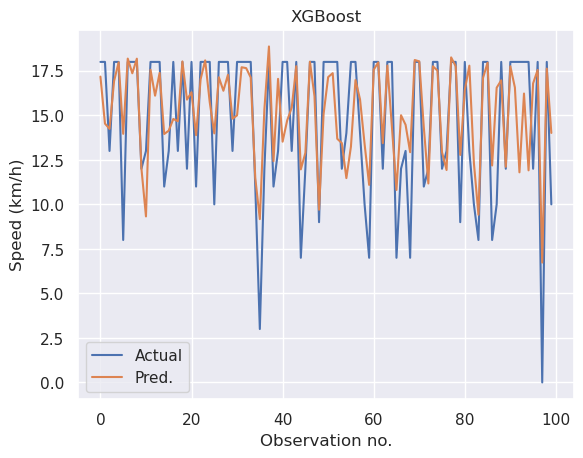

In [12]:
ml_help.plot_prediction(y_test, y_pred, "XGBoost", "Speed (km/h)", "065_xgboost_predictions")

## Random Forest

### Run CV

In [13]:
from sklearn.ensemble import RandomForestRegressor

params = ml_help.params_to_dict("063_random_forest")

In [ ]:
random_forest_pipeline = make_pipeline(StandardScaler(),RandomForestRegressor(**params))

random_forest_cv_metrics = ml_help.run_stratified_kfold("Random Forest",random_forest_pipeline,X_train,y_train)
random_forest_cv_metrics

### Test using previously unseen data

In [14]:
random_forest_pipeline = make_pipeline(StandardScaler(),RandomForestRegressor(**params))

start = time()
pipe = random_forest_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

random_forest_metrics = ml_help.get_metrics_reg("Random Forest",y_test,y_pred)
random_forest_metrics["time_to_fit"] = end-start
random_forest_metrics

{'model': 'Random Forest',
 'r2': 0.45525918145366906,
 'mae': 1.887790320475429,
 'mse': 6.353361868448189,
 'rmse': 2.5205876038035635,
 'mape': 19228450599977.574,
 'time_to_fit': 30.309273719787598}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


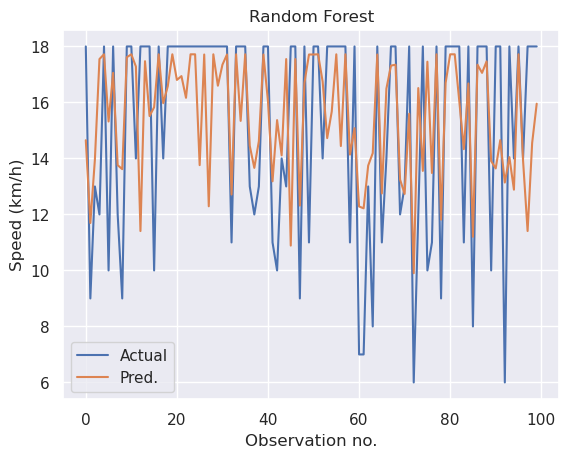

In [15]:
ml_help.plot_prediction(y_test, y_pred, "Random Forest", "Speed (km/h)", "065_random_forest_predictions")

## Decision Tree

### Run CV

In [16]:
from sklearn.tree import DecisionTreeRegressor

params = ml_help.params_to_dict("063_decision_tree")

In [ ]:
decision_tree_pipeline = make_pipeline(StandardScaler(),DecisionTreeRegressor(**params))

dtr_cv_metrics = ml_help.run_stratified_kfold("Decision Tree",decision_tree_pipeline,X_train,y_train)
dtr_cv_metrics

### Test using previously unseen data

In [17]:
decision_tree_pipeline = make_pipeline(StandardScaler(),DecisionTreeRegressor(**params))

start = time()
pipe = decision_tree_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

dtr_metrics = ml_help.get_metrics_reg("Decision Tree",y_test,y_pred)
dtr_metrics["time_to_fit"] = end-start
dtr_metrics

{'model': 'Decision Tree',
 'r2': 0.43004631996154785,
 'mae': 1.9057697903730517,
 'mse': 6.6474218545336035,
 'rmse': 2.5782594622212875,
 'mape': 11220718576471.799,
 'time_to_fit': 0.25318360328674316}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


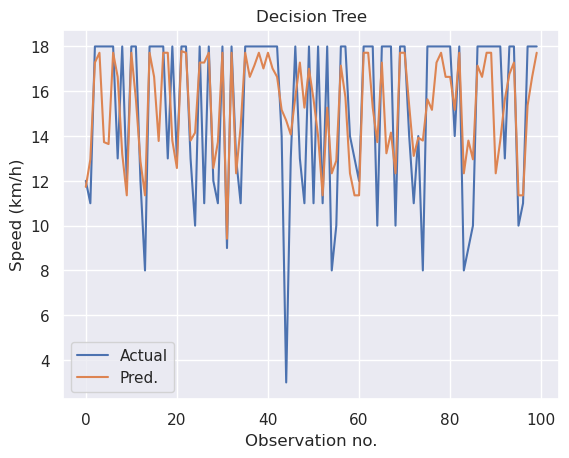

In [18]:
ml_help.plot_prediction(y_test, y_pred, "Decision Tree", "Speed (km/h)", "065_decision_tree_predictions")

## MLP

### Run CV

In [19]:
from sklearn.neural_network import MLPRegressor

params = ml_help.params_to_dict("063_mlpr")

In [ ]:
mlp_pipeline = make_pipeline(StandardScaler(),MLPRegressor(**params))

mlp_cv_metrics = ml_help.run_stratified_kfold("MLP",mlp_pipeline,X_train,y_train)
mlp_cv_metrics

### Test using previously unseen data

In [20]:
mlp_pipeline = make_pipeline(StandardScaler(),MLPRegressor(**params))

start = time()
pipe = mlp_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

mlp_metrics = ml_help.get_metrics_reg("MLP",y_test,y_pred)
mlp_metrics["time_to_fit"] = end-start
mlp_metrics

/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'model': 'MLP',
 'r2': 0.5023092529402599,
 'mae': 1.7655002,
 'mse': 5.8046126,
 'rmse': 2.4092765,
 'mape': 20317108000000.0,
 'time_to_fit': 86.5163221359253}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


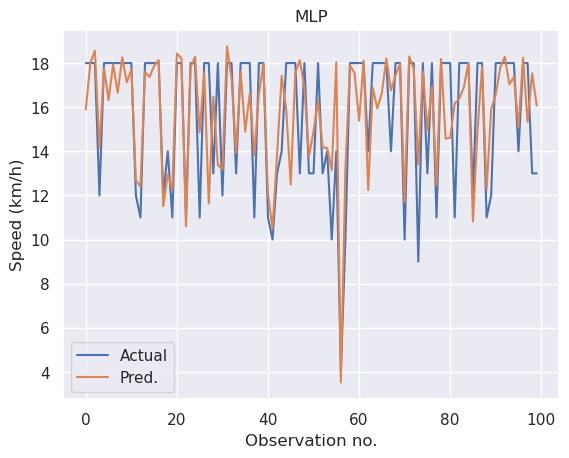

In [21]:
ml_help.plot_prediction(y_test, y_pred, "MLP", "Speed (km/h)", "065_mlp_predictions")

# Store metrics

In [18]:
metrics_cv = pd.concat([pd.DataFrame(xgb_cv_metrics,index=[0]),pd.DataFrame(random_forest_cv_metrics,index=[0]),pd.DataFrame(dtr_cv_metrics,index=[0]),pd.DataFrame(mlp_cv_metrics,index=[0])])
metrics_cv.to_csv("./metrics/065_yonge_flow_weather_cv_metrics.csv.zip",index=False,compression="zip")

metrics = pd.concat([pd.DataFrame(xgb_metrics,index=[0]),pd.DataFrame(random_forest_metrics,index=[0]),pd.DataFrame(dtr_metrics,index=[0]),pd.DataFrame(mlp_metrics,index=[0])])
metrics.to_csv("./metrics/065_yonge_flow_weather_metrics.csv.zip",index=False,compression="zip")

# Print CV metrics

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


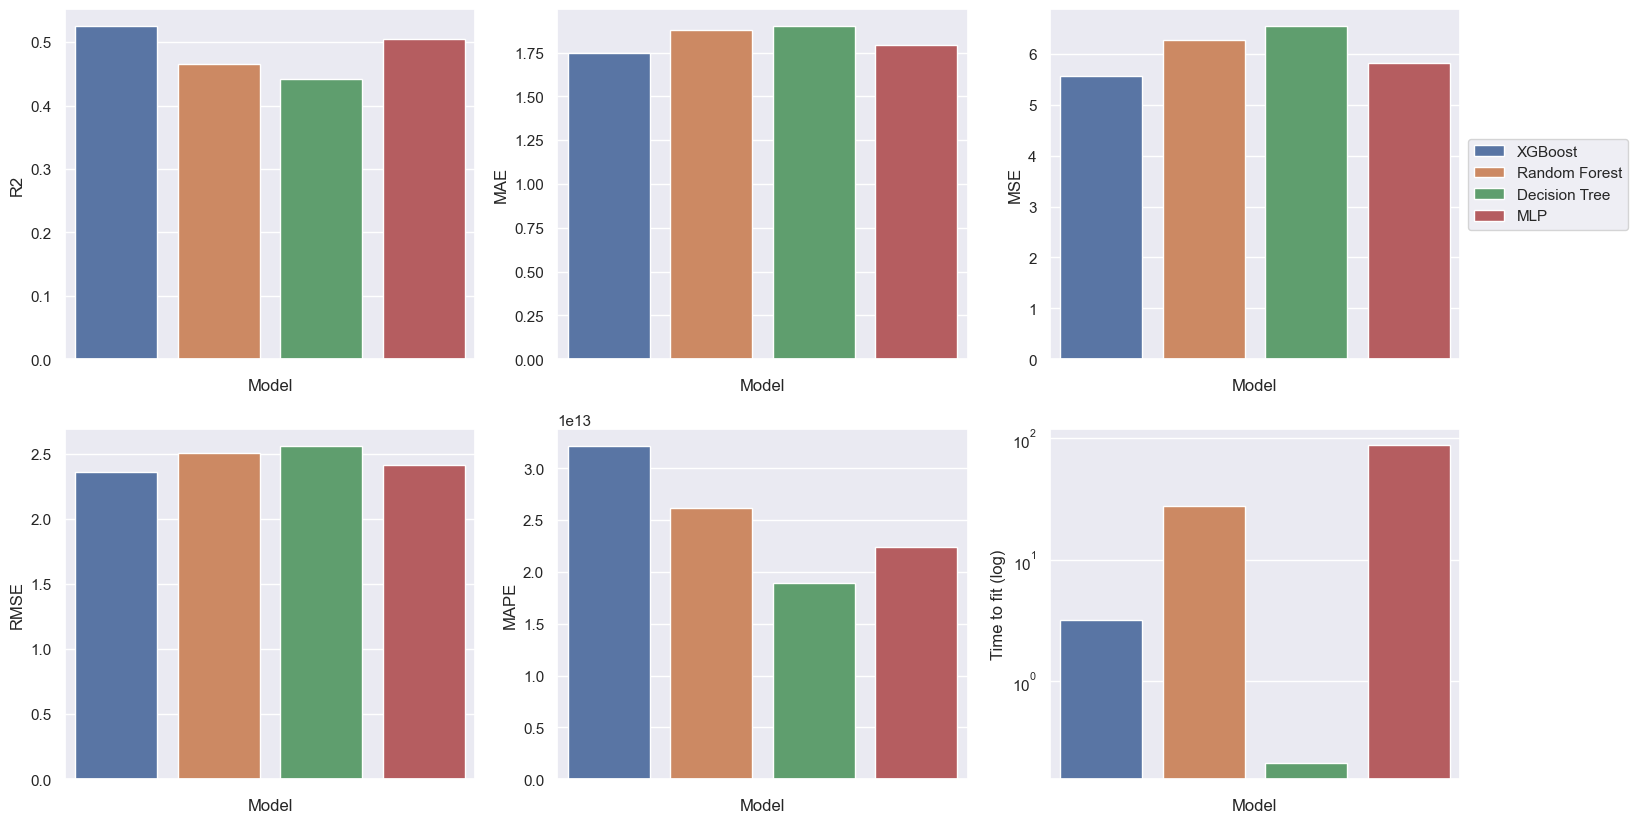

In [19]:
sns.set_theme()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics_cv, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics_cv, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics_cv, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics_cv, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics_cv, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics_cv, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/065_yonge_flow_weather_cv_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/065_yonge_flow_weather_cv_metrics.png",bbox_inches="tight")

# Print metrics

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


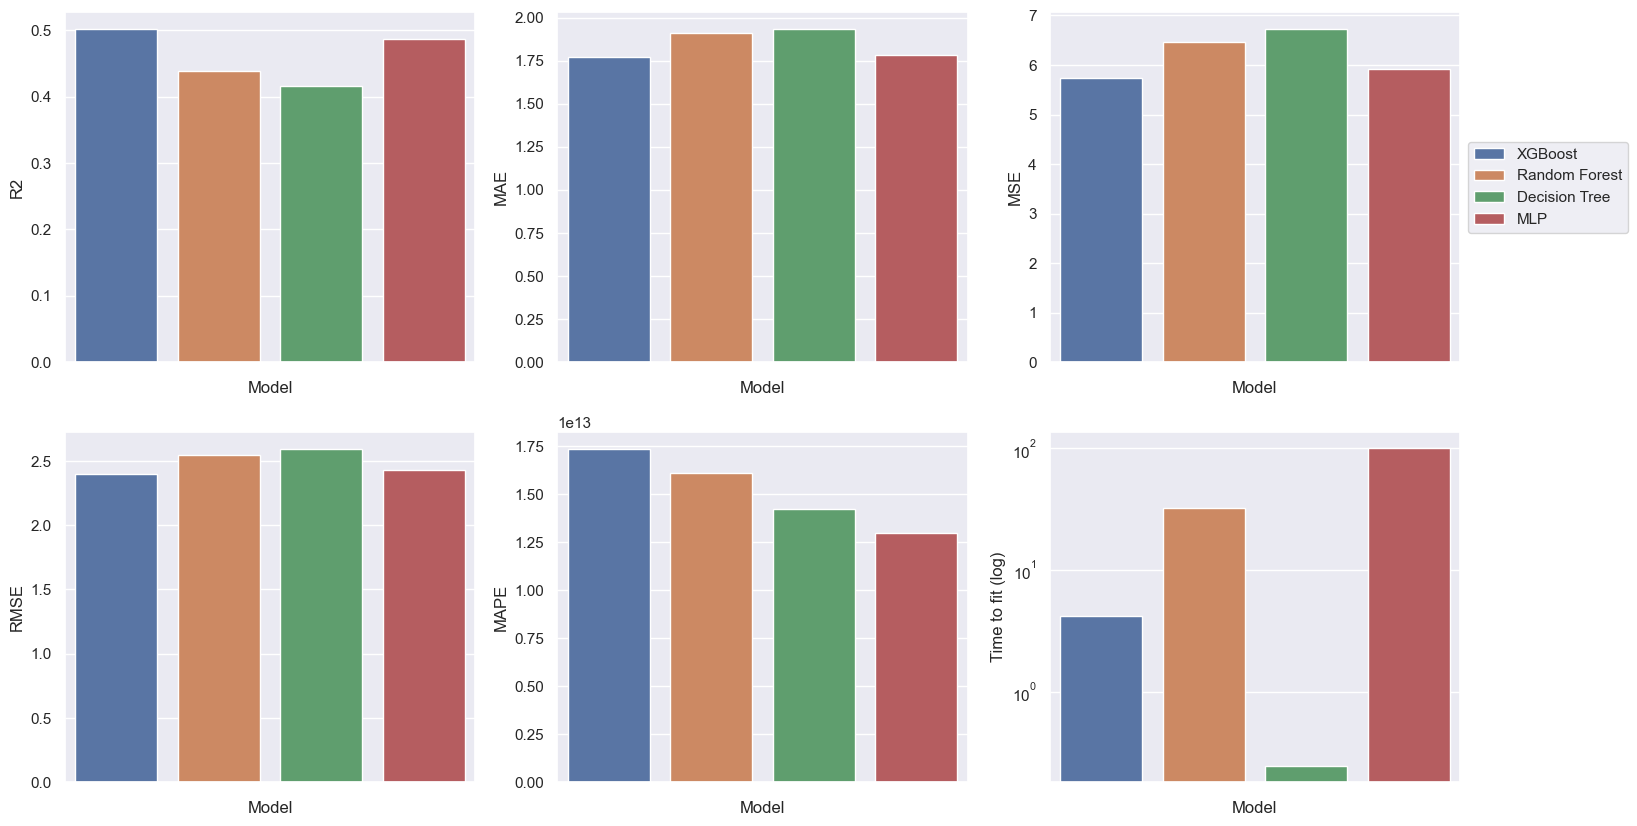

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/065_yonge_flow_weather_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/065_yonge_flow_weather_metrics.png",bbox_inches="tight")